In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.DataFrame(np.random.randint(1,10,32).reshape(8,4), columns=['a','b','c','d'])

In [3]:
df

,a,b,c,d
0,8,8,4,2
1,5,3,2,8
2,5,2,3,3
3,1,1,1,2
4,6,1,3,8
5,9,4,9,4
6,8,9,3,4
7,3,5,9,9


In [4]:
x = df.a.value_counts()

In [5]:
y = df.b.value_counts()

([array([4., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
  array([6., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 2 Lists of Patches objects>)

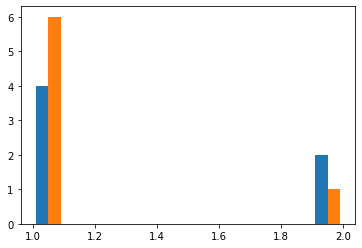

In [6]:
plt.hist([x,y])

In [7]:
hist,bins = np.histogram(x)

In [8]:
hist

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [9]:
bins

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

### Chapter 3

In [10]:
# Try doing what the book's PMF function does with pandas

vals = pd.Series([1,2,2,3,5])
vals

0    1
1    2
2    2
3    3
4    5
dtype: int64

In [11]:
pmf = vals.value_counts(normalize=True,).sort_index()
pmf

1    0.2
2    0.4
3    0.2
5    0.2
dtype: float64

In [12]:
pmf[2]

0.4

### Trying out some scipy.stats and numpy stuff for pmf

In [13]:
import scipy.stats as stats

In [14]:
a = np.random.randint(1, 5, size=20)
a

array([1, 2, 1, 3, 3, 3, 1, 2, 3, 3, 4, 3, 3, 1, 1, 1, 2, 1, 4, 4])

In [15]:
val, cnt = np.unique(a, return_counts=True)

In [16]:
rv = stats.rv_discrete(values=(val, cnt/len(a)))

In [17]:
rv

In [18]:
rv.pk

array([0.35, 0.15, 0.35, 0.15])

In [19]:
rv.xk

array([1, 2, 3, 4])

In [20]:
rv.pmf(1)

0.35

In [21]:
rv.pmf(5)

0.0

In [22]:
rv.pmf(2)

0.15

In [23]:
rv.cdf(2)

0.5

In [39]:
rv.mean(), rv.std(), rv.var()

(2.3, 1.1000000000000003, 1.2100000000000009)

In [24]:
# Try creating the rv from the pandas Series
rv2 = stats.rv_discrete(values=(pmf.index, pmf))

In [25]:
rv2.xk

array([1, 2, 3, 5], dtype=int64)

In [26]:
rv2.pk

array([0.2, 0.4, 0.2, 0.2])

In [53]:
l = [1,2,3]
n = np.array([1,2,3])

In [55]:
l*3, n*3

([1, 2, 3, 1, 2, 3, 1, 2, 3], array([3, 6, 9]))

In [58]:
sum(l)

6

<BarContainer object of 4 artists>

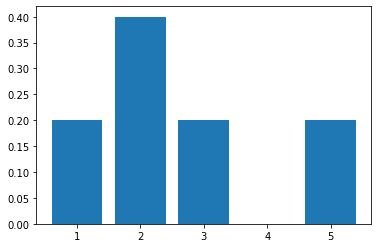

In [27]:
#Try plotting rv2
plt.bar(rv2.xk, rv2.pk)

<BarContainer object of 4 artists>

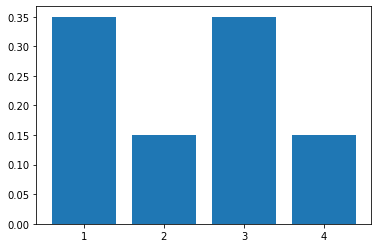

In [28]:
#Try plotting rv
plt.bar(rv.xk, rv.pk, tick_label=rv.xk)

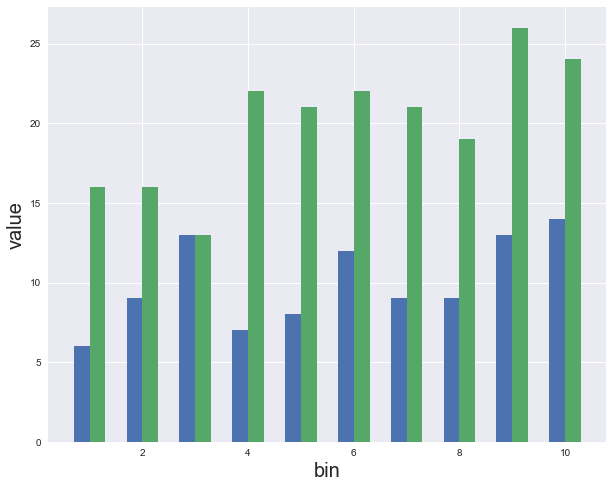

In [29]:
plt.style.use('seaborn')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

data = np.random.randint(1,11,100)
val, cnt = np.unique(data, return_counts=True)
ax.bar(val, cnt, width=-.3, align='edge')

data2 = np.random.randint(1,11,200)
val2, cnt2 = np.unique(data2, return_counts=True)
ax.bar(val2, cnt2, width=.3, align='edge')

ax.set_xlabel('bin', fontsize=20)
ax.set_ylabel('value', fontsize=20)

plt.show()

In [30]:
val,cnt

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 6,  9, 13,  7,  8, 12,  9,  9, 13, 14], dtype=int64))

In [31]:
val2,cnt2

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([16, 16, 13, 22, 21, 22, 21, 19, 26, 24], dtype=int64))

In [32]:
# Messing around with methods of RVs
stats.norm.cdf(-1)

0.15865525393145707

In [33]:
stats.norm.pdf(3)

0.0044318484119380075

In [34]:
import math
1/math.sqrt(6.28)

0.3990434422338111

In [35]:
stats.norm.pdf(0)

0.3989422804014327

In [36]:
# So pdf returns the 'y-value' at a certain x, and cdf returns the area under the curve left of x